# Customer Churn Prediction - Playground Series S4E1

**Notebook Organization:**
- Define Project
- Data Loading and Initial Look
- Data Visualization
- Data Cleaning and Preparation for Machine Learning 
- Problem Formulation
- Train ML Algorithm
- Evaluate Performance on Validation Sample
- Apply ML to the challenge test set and Generate submission file


## Define Project

* Provide Project link: https://www.kaggle.com/competitions/playground-series-s4e1/overview

### Short paragraph describing the challenge:

This competition focuses on predicting bank customer churn—determining whether a customer will close their account. It's a binary classification task evaluated using the Area Under the ROC Curve (AUC) metric. The dataset is synthetically generated from a deep learning model trained on the original Bank Customer Churn Prediction dataset, making it suitable for practicing classification techniques in a realistic setting.

### Briefly describe the data.

The dataset comprises 14 features per customer, including:​

Numerical Features: CreditScore, Age, Tenure, Balance, NumOfProducts, EstimatedSalary

Categorical Features: Geography, Gender, HasCrCard, IsActiveMember

Identifiers: id, CustomerId, Surname

Target Variable: Exited (1 if the customer churned, 0 otherwise)

The training dataset contains 165,034 rows and 14 features. The target variable Exited is imbalanced, with approximately 21% of customers having churned.


# Data Loading and Initial Look

In [48]:
import pandas as pd
# Load the data
df = pd.read_csv("train.csv")

df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [16]:
# Count the number of rows and features
print("The dataset has", df.shape, "rows and features")

The dataset has (165034, 14) rows and features


In [20]:
#Check for missing values
df.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [22]:
# Summarize features information

# Identify categorical and numerical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(include=['number']).columns.tolist()

# Remove target and identifiers from features when describing
feature_summary = []

for col in df.columns:
    feature_type = 'Categorical' if col in categorical_features else 'Numerical'
    values = df[col].unique() if feature_type == 'Categorical' else f"{df[col].min()} to {df[col].max()}"
    missing = df[col].isnull().sum()
    
    if feature_type == 'Numerical':
        # Outlier detection using IQR
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outlier_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outlier_flag = 'Yes' if outlier_count > 0 else 'No'
    else:
        outlier_flag = 'N/A'
    
    feature_summary.append({
        'Feature': col,
        'Type': feature_type,
        'Values': values if isinstance(values, str) else ', '.join(map(str, values[:5])) + ('...' if len(values) > 5 else ''),
        'Missing Values': missing,
        'Outliers': outlier_flag
    })

feature_summary_df = pd.DataFrame(feature_summary)
feature_summary_df


,Feature,Type,Values,Missing Values,Outliers
0,id,Numerical,0 to 165033,0,No
1,CustomerId,Numerical,15565701 to 15815690,0,No
2,Surname,Categorical,"Okwudilichukwu, Okwudiliolisa, Hsueh, Kao, Chi...",0,N/A
3,CreditScore,Numerical,350 to 850,0,Yes
4,Geography,Categorical,"France, Spain, Germany",0,N/A
5,Gender,Categorical,"Male, Female",0,N/A
6,Age,Numerical,18.0 to 92.0,0,Yes
7,Tenure,Numerical,0 to 10,0,No
8,Balance,Numerical,0.0 to 250898.09,0,No
9,NumOfProducts,Numerical,1 to 4,0,Yes


# Data Visualization


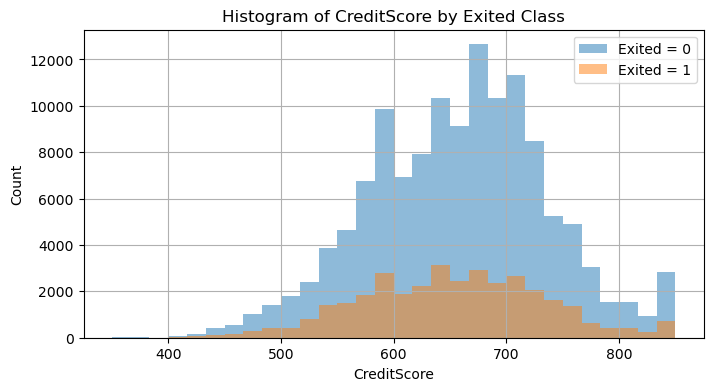

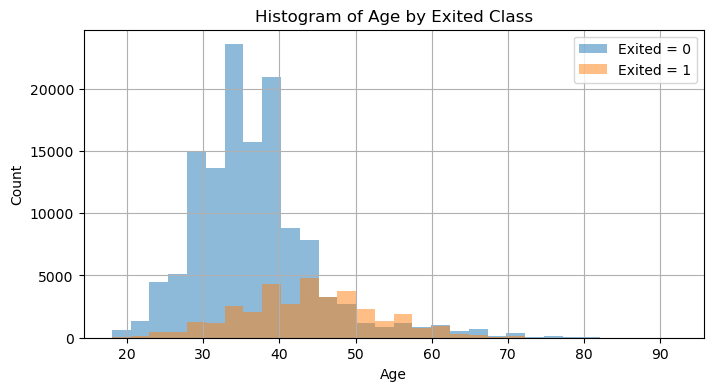

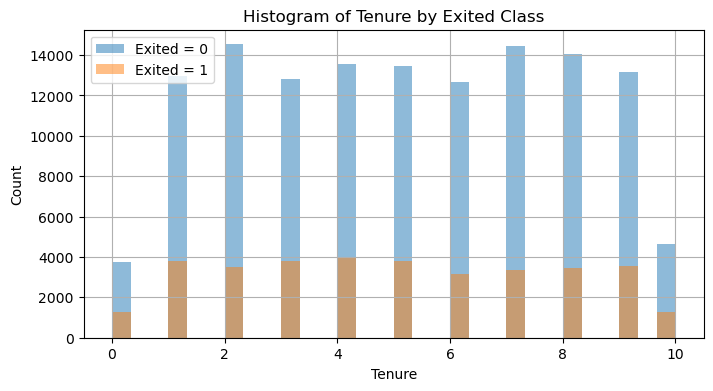

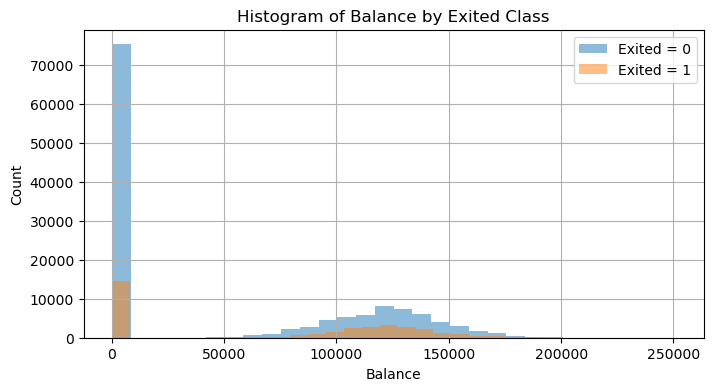

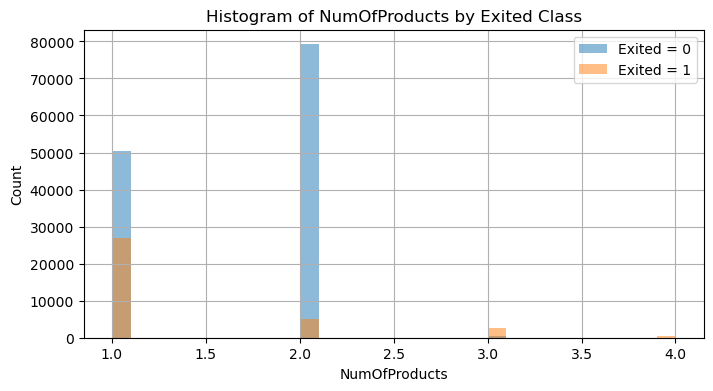

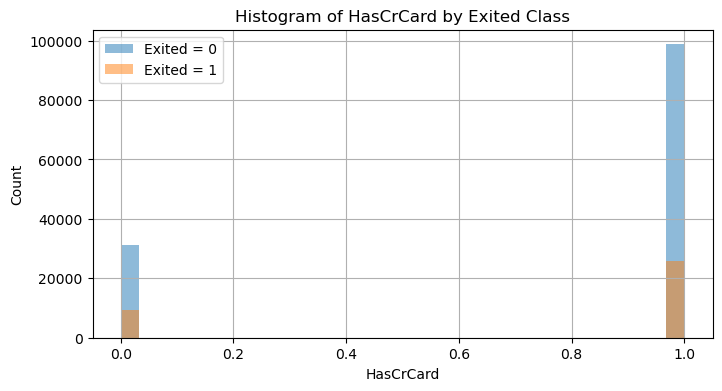

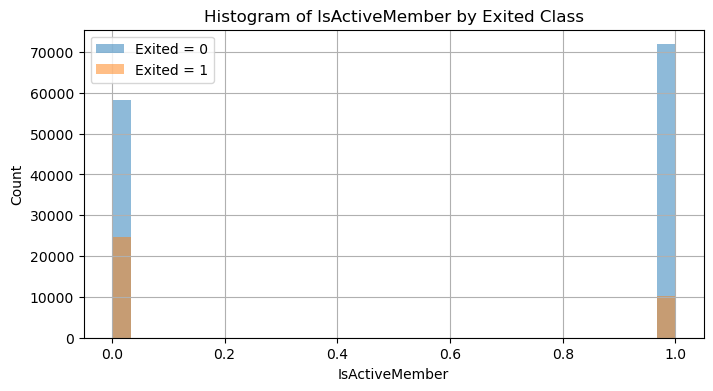

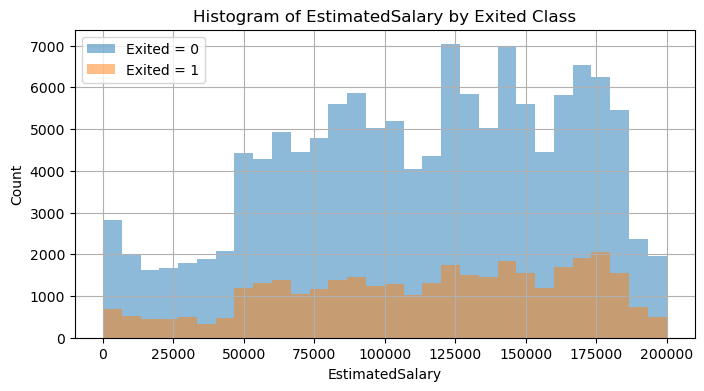

In [24]:
import matplotlib.pyplot as plt

# histograms for each numerical feature
numerical_features = [col for col in df.columns if df[col].dtype != 'object' and col not in ['id', 'CustomerId', 'Exited']]

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    
    plt.hist(df[df['Exited'] == 0][feature], bins=30, alpha=0.5, label='Exited = 0')
    plt.hist(df[df['Exited'] == 1][feature], bins=30, alpha=0.5, label='Exited = 1')
    
    plt.title(f'Histogram of {feature} by Exited Class')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend()
    plt.grid(True)
    plt.show()


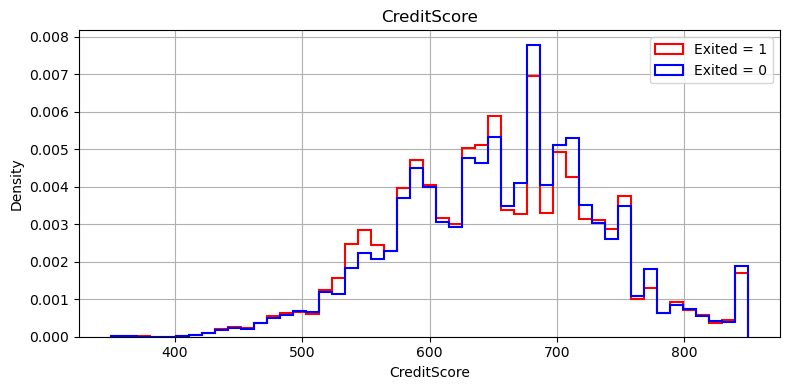

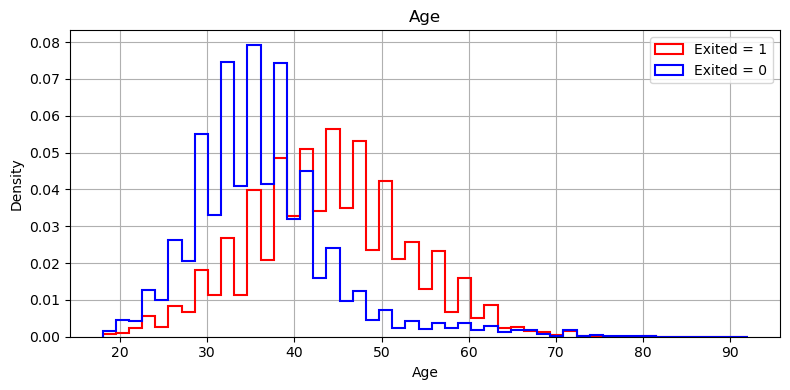

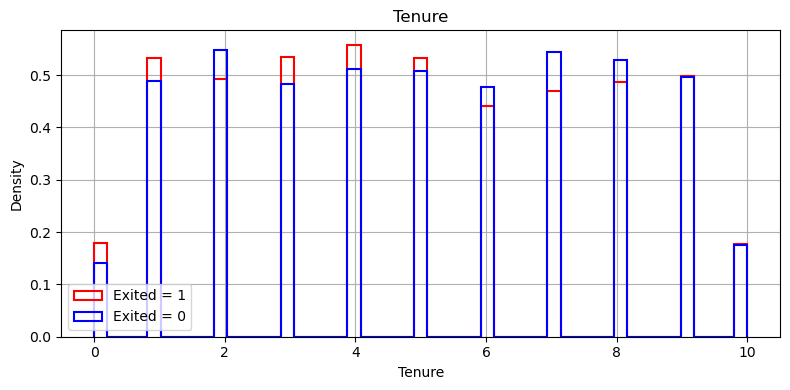

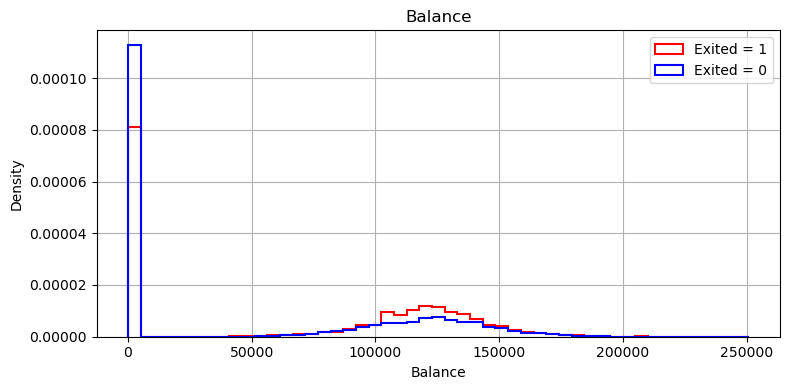

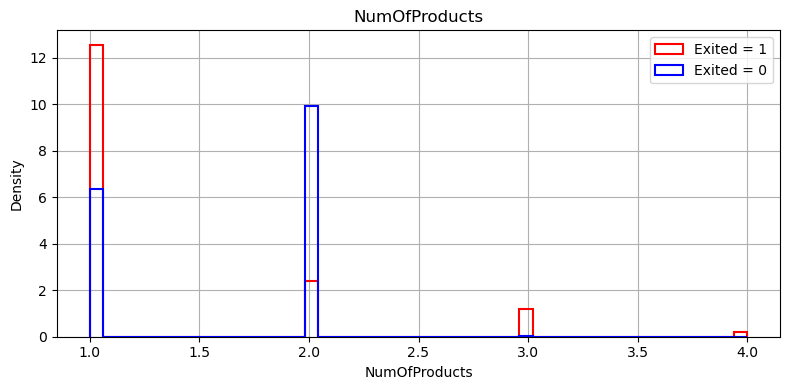

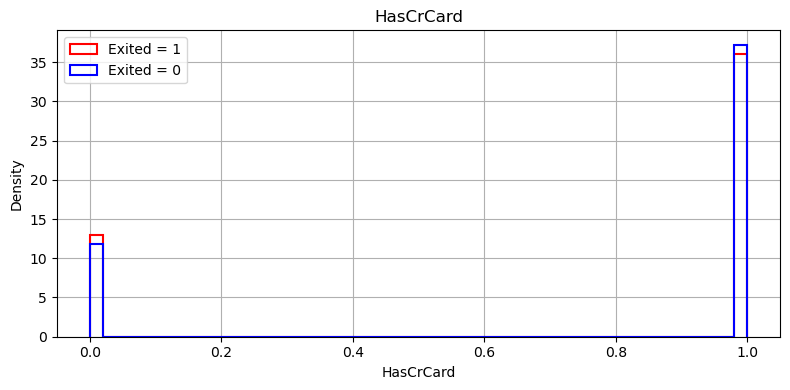

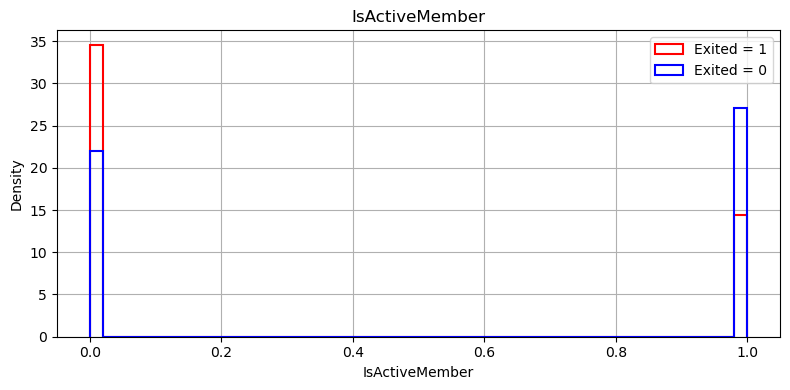

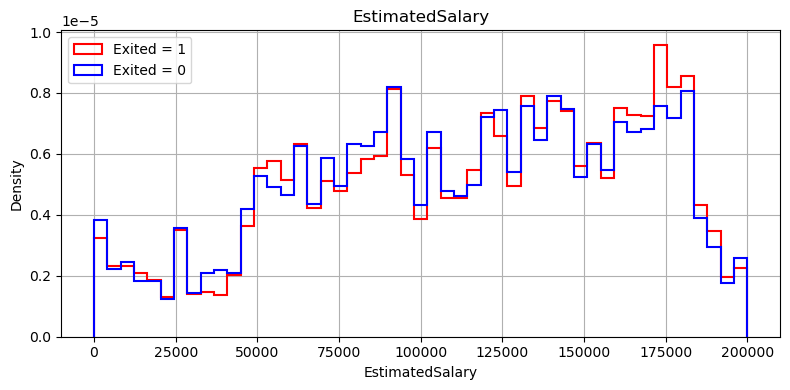

In [28]:
# line-style density histograms for numerical features
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    
    bins = np.linspace(df[feature].min(), df[feature].max(), 50)
    
    plt.hist(df[df['Exited'] == 1][feature], bins=bins, density=True, histtype='step',
             color='red', label='Exited = 1', linewidth=1.5)
    plt.hist(df[df['Exited'] == 0][feature], bins=bins, density=True, histtype='step',
             color='blue', label='Exited = 0', linewidth=1.5)
    
    plt.title(f'{feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [30]:
# Categorical variables
categorical_features = ['Geography', 'Gender']

# Count distributions of each category for Exited = 0 and 1
cat_summary = {}

for feature in categorical_features:
    counts = df.groupby(['Exited', feature]).size().unstack().fillna(0)
    cat_summary[feature] = counts

cat_summary


{'Geography': Geography  France  Germany  Spain
 Exited                           
 0           78643    21492  29978
 1           15572    13114   6235,
 'Gender': Gender  Female   Male
 Exited               
 0        51779  78334
 1        20105  14816}

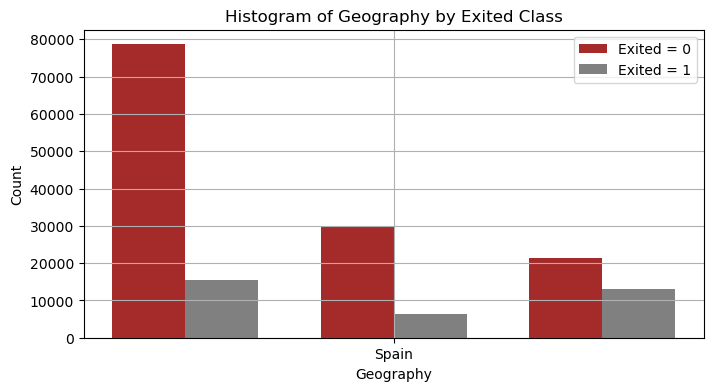

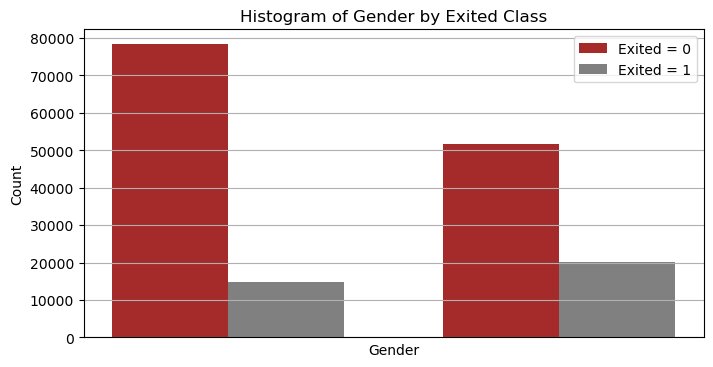

In [142]:
categorical_features = ['Geography', 'Gender']

for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    
    # Plot histogram
    plt.hist(
        [df[df['Exited'] == 0][feature], df[df['Exited'] == 1][feature]],
        label=['Exited = 0', 'Exited = 1'],
        color=['brown', 'gray'],
        bins=len(df[feature].unique()),
        rwidth=0.7,
        align='mid'
    )
    
    plt.title(f'Histogram of {feature} by Exited Class')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend()
    plt.grid(True)
    plt.show()


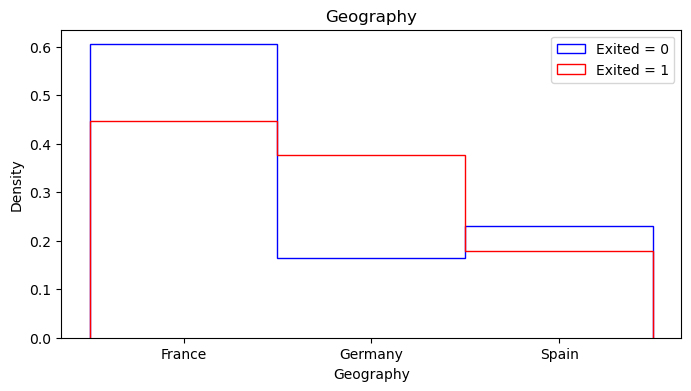

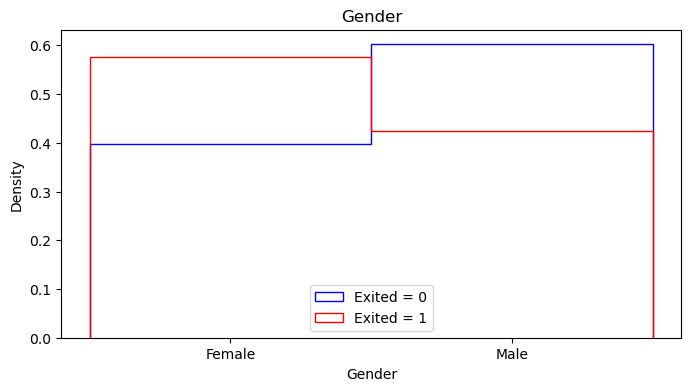

In [35]:
# histograms for categorical features
for feature in ['Geography', 'Gender']:
    categories = sorted(df[feature].unique())
    cat_to_num = {cat: i for i, cat in enumerate(categories)}

    vals_0 = df[df['Exited'] == 0][feature].map(cat_to_num)
    vals_1 = df[df['Exited'] == 1][feature].map(cat_to_num)

    bins = np.arange(len(categories) + 1) - 0.5

    plt.figure(figsize=(8, 4))
    plt.hist(vals_0, bins=bins, density=True, histtype='step', color='blue', label='Exited = 0')
    plt.hist(vals_1, bins=bins, density=True, histtype='step', color='red', label='Exited = 1')
    plt.xticks(range(len(categories)), categories)
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.title(feature)
    plt.legend()
    plt.show()


In [40]:
summary_tables = {}

for feature in ['Geography', 'Gender']:

    counts = df.groupby([feature, 'Exited']).size().unstack(fill_value=0)
    counts.columns = ['Exited = 0', 'Exited = 1']
    counts['Total'] = counts['Exited = 0'] + counts['Exited = 1']
    counts['% Churned'] = (counts['Exited = 1'] / counts['Total'] * 100).round(1)
    summary_tables[feature] = counts.reset_index()

summary_tables['Geography']


,Geography,Exited = 0,Exited = 1,Total,% Churned
0,France,78643,15572,94215,16.5
1,Germany,21492,13114,34606,37.9
2,Spain,29978,6235,36213,17.2


In [42]:
summary_tables['Gender']

,Gender,Exited = 0,Exited = 1,Total,% Churned
0,Female,51779,20105,71884,28.0
1,Male,78334,14816,93150,15.9


**CreditScore**:  
There is some slight separation, customers with lower credit scores tend to churn a little more. It might help but it's not the strongest feature.

**Geography**:  
Very important. Customers from Germany have a much higher probability of exiting compared to those from France or Spain.

**Gender**:  
Useful feature. Female customers tend to churn more often than male customers.

**Age**:  
One of the strongest features. Older customers are much more likely to exit than younger ones.

**Tenure**:  
Not very helpful. Tenure does not show a strong difference between customers who exited and those who stayed.

**Balance**:  
Might be useful. Customers with either very low or very high balances seem more likely to churn, but the pattern is not very clear.

**NumOfProducts**:  
Strong predictor. Customers with fewer products are much more likely to exit.

**HasCrCard**:  
Weak feature. Having a credit card or not doesn’t make a big difference in churn rates.

**IsActiveMember**:  
Very important feature. Inactive members are significantly more likely to churn than active ones.

**EstimatedSalary**:  
Not very useful. The salary distribution looks random across both classes.

**id**:  
Not useful. It’s just a row number and doesn't carry any information for prediction.

**CustomerId**:  
Not useful. It’s just a customer identifier and has no predictive value.

**Surname**:  
Not useful directly. Surnames don't seem related to churn unless you do some complicated feature engineering (which is not necessary here).

# Data Cleaning and Preperation for Machine Learning


We drop id, CustomerId, and Surname.

These are identifiers and have no predictive value for whether a customer exits.

In [56]:
X = df.drop(columns=['id', 'CustomerId', 'Surname', 'Exited'])
y = df['Exited']

Rescaling Features
Why Rescale? Features like CreditScore, Age, Balance, and EstimatedSalary are on very different scales. Many machine learning models (like Logistic Regression, KNN, SVM) perform better when features are on the same scale.

Which Features to Rescale? Rescale numerical continuous features: CreditScore, Age, Tenure, Balance, NumOfProducts, EstimatedSalary. Binary features like HasCrCard and IsActiveMember are already 0 or 1. No scaling needed.

How to Rescale? Use StandardScaler to standardize features (mean = 0, std = 1)

In [59]:
from sklearn.preprocessing import StandardScaler

# Features to rescale
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numerical_features] = scaler.fit_transform(X[numerical_features])


One-Hot Encoding Categorical Features
Why Encode? Machine learning models need numerical input. Categorical features like Geography and Gender must be converted into numerical format.

How? Use one-hot encoding

In [63]:
X_scaled = pd.get_dummies(X_scaled, columns=['Geography', 'Gender'])

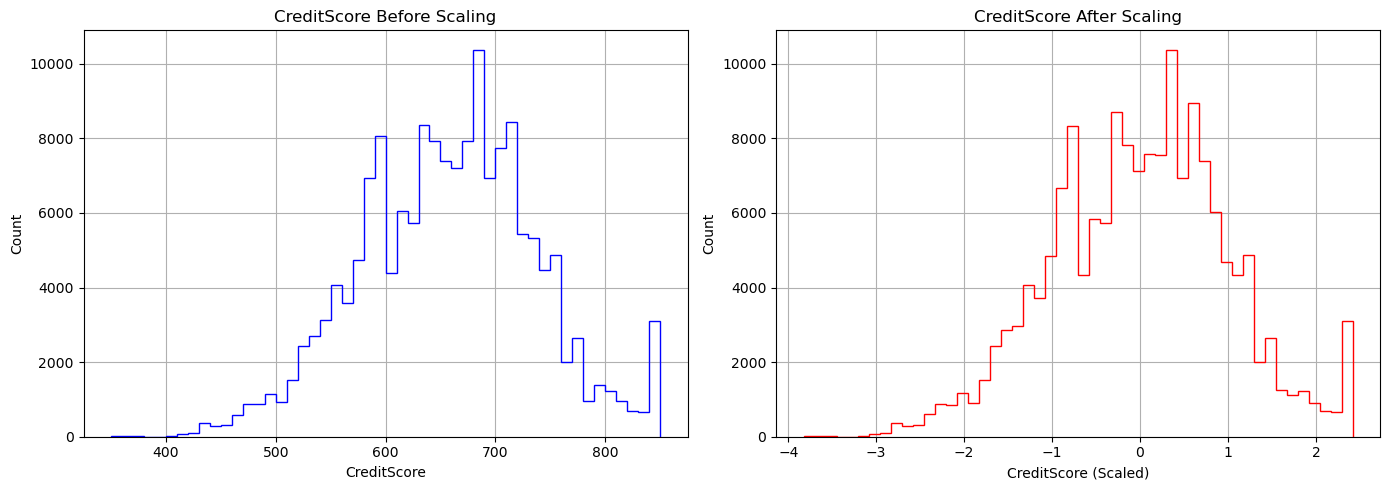

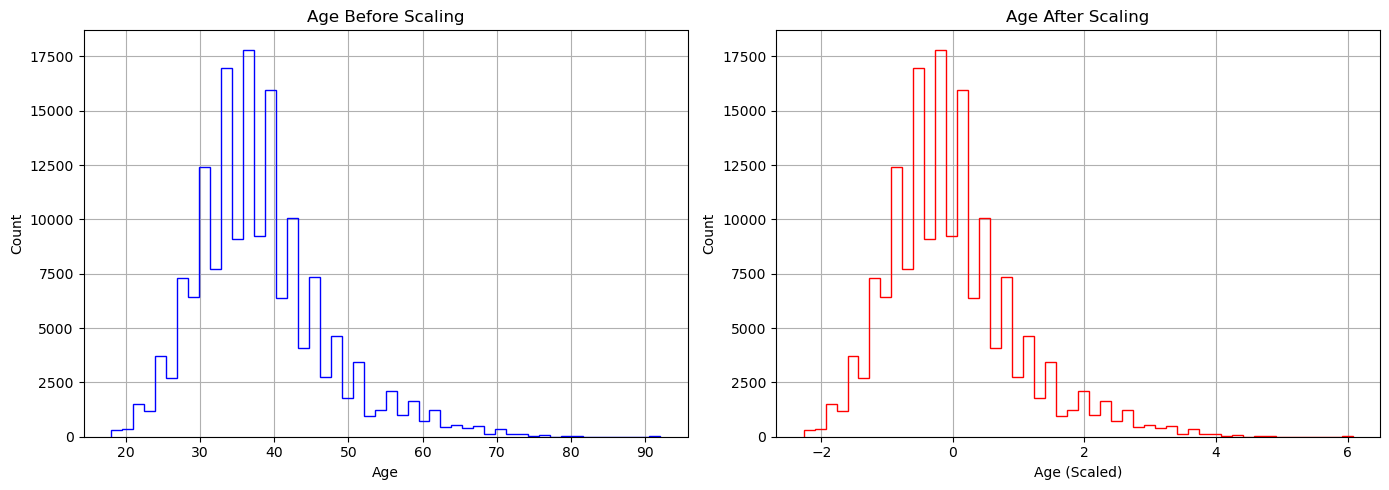

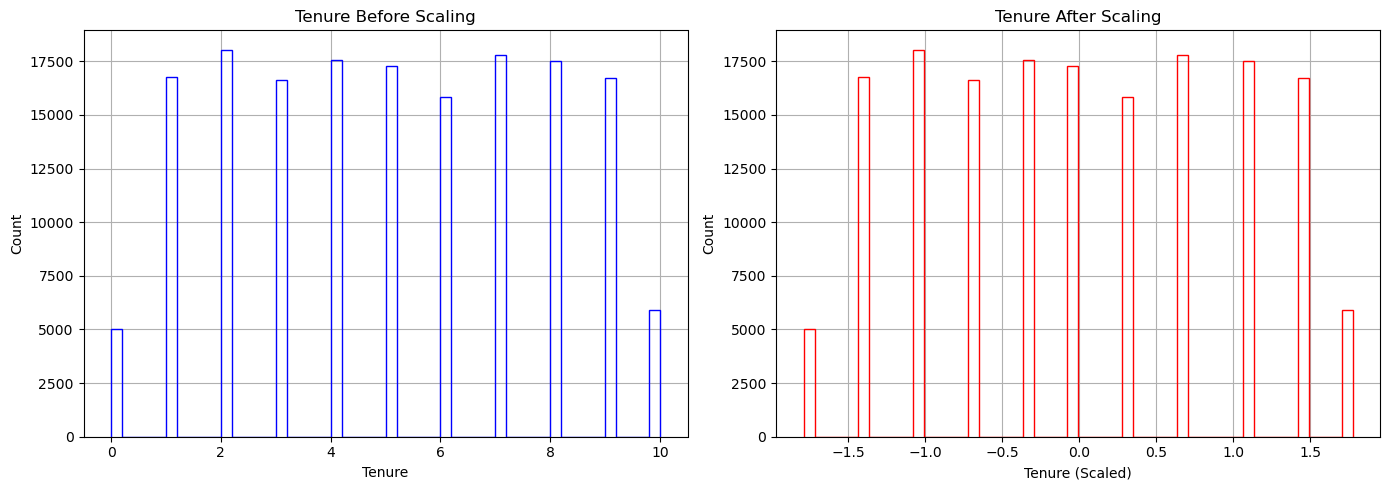

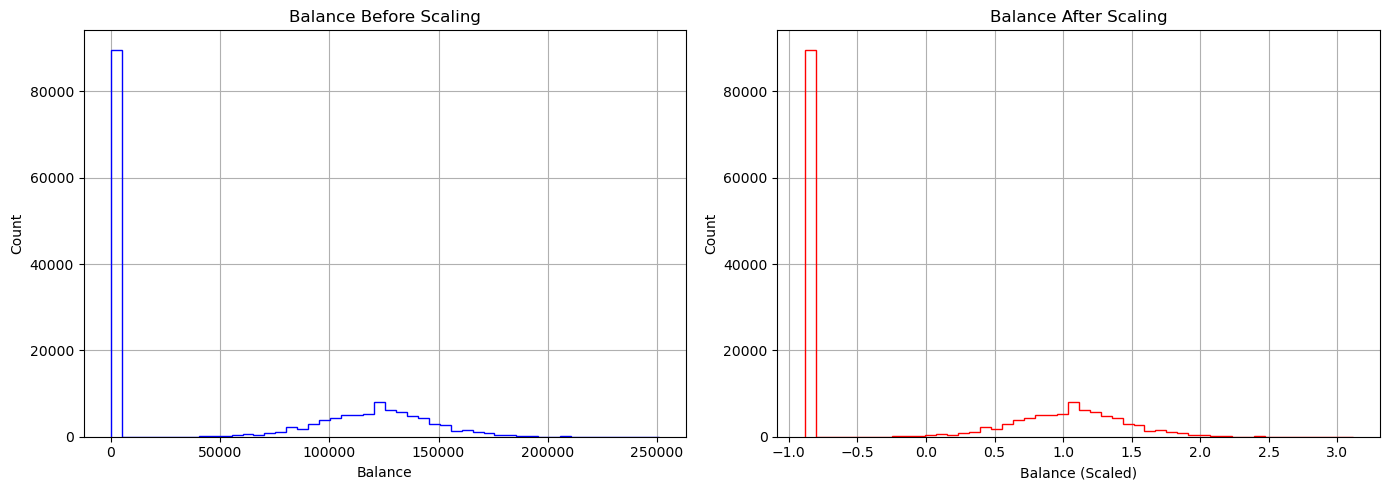

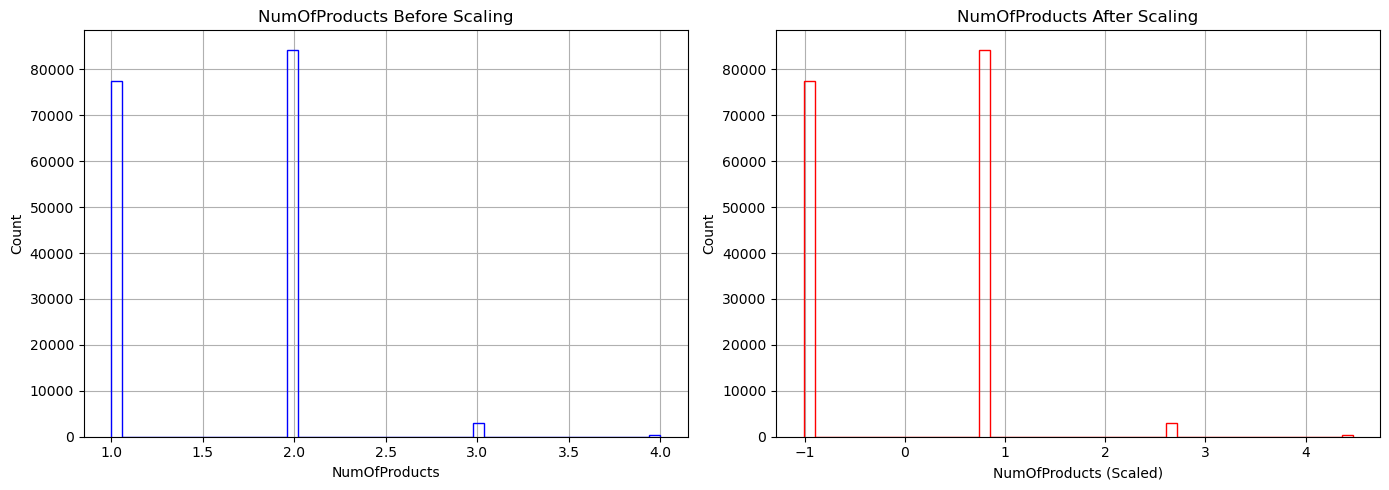

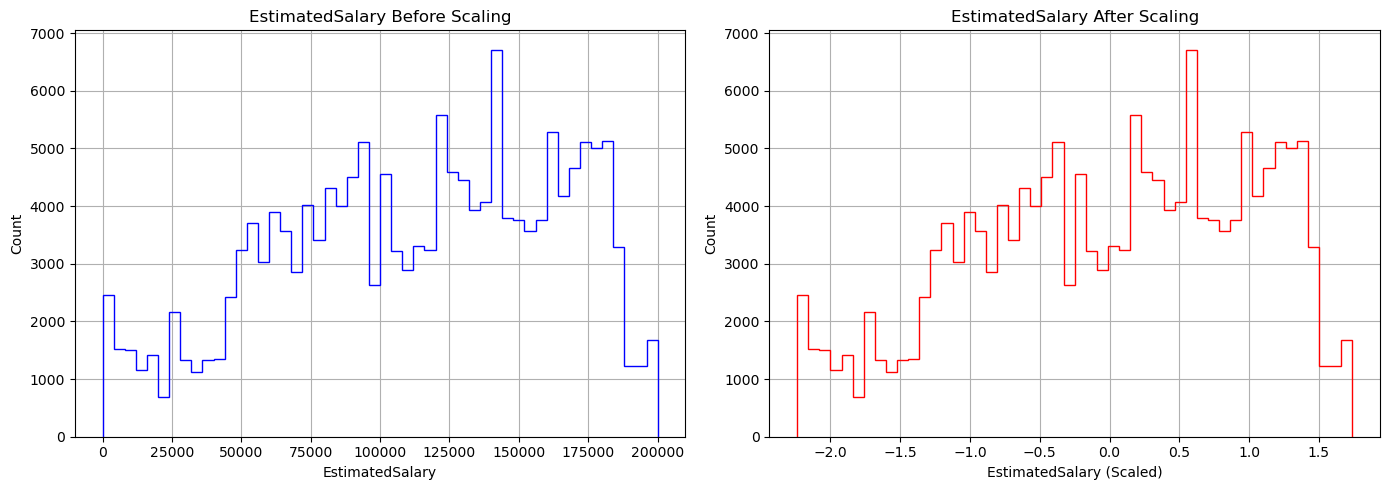

In [65]:
for feature in numerical_features:
    plt.figure(figsize=(14, 5))

    # Before Scaling
    plt.subplot(1, 2, 1)
    plt.hist(X[feature], bins=50, color='blue', histtype='step')
    plt.title(f'{feature} Before Scaling')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.grid(True)

    # After Scaling
    plt.subplot(1, 2, 2)
    plt.hist(X_scaled[feature], bins=50, color='red', histtype='step')
    plt.title(f'{feature} After Scaling')
    plt.xlabel(feature + ' (Scaled)')
    plt.ylabel('Count')
    plt.grid(True)

    plt.tight_layout()
    plt.show()


In [68]:
X_scaled.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.144135,-0.578074,-0.719973,-0.883163,0.814298,1.0,0.0,1.369486,True,False,False,False,True
1,-0.367706,-0.578074,-1.432694,-0.883163,0.814298,1.0,1.0,-1.254085,True,False,False,False,True
2,0.268974,0.211354,1.774548,-0.883163,0.814298,1.0,0.0,1.437422,True,False,False,False,True
3,-0.941966,-0.465299,-1.076334,1.486918,-1.013348,1.0,1.0,-0.557018,True,False,False,False,True
4,0.743362,-0.578074,-0.007253,-0.883163,0.814298,1.0,1.0,-1.938770,False,False,True,False,True


In [70]:
new_df = pd.concat([X_scaled, y], axis=1)

# Save new_df to CSV
new_df.to_csv('cleaned_train.csv', index=False)


# Problem Formulation

In [72]:
# Drop duplicate rows if any
new_df = new_df.drop_duplicates()


In [74]:
from sklearn.model_selection import train_test_split

X = new_df.drop(columns=['Exited'])
y = new_df['Exited']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


# Train ML Algorithm

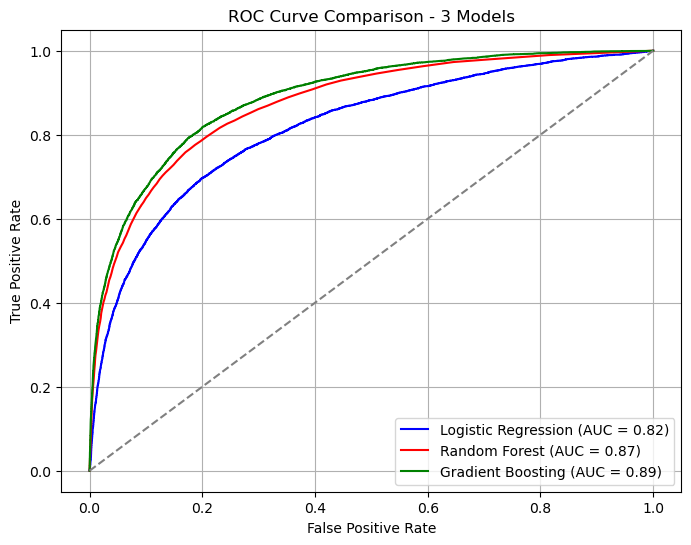

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 1. Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
y_val_pred_proba_lr = lr_model.predict_proba(X_val)[:, 1]

# 2. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_val_pred_proba_rf = rf_model.predict_proba(X_val)[:, 1]

# 3. Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_val_pred_proba_gb = gb_model.predict_proba(X_val)[:, 1]

# ROC and AUC for each
fpr_lr, tpr_lr, _ = roc_curve(y_val, y_val_pred_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_rf, tpr_rf, _ = roc_curve(y_val, y_val_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_gb, tpr_gb, _ = roc_curve(y_val, y_val_pred_proba_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Plotting all three ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, color='red', label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_gb, tpr_gb, color='green', label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison - 3 Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Evaluate Performance on Validation Sample

In [144]:
from sklearn.metrics import accuracy_score

# Logistic Regression
y_val_pred_lr = lr_model.predict(X_val)
accuracy_lr = accuracy_score(y_val, y_val_pred_lr)


# Random Forest
y_val_pred_rf = rf_model.predict(X_val)
accuracy_rf = accuracy_score(y_val, y_val_pred_rf)


# Gradient Boosting
y_val_pred_gb = gb_model.predict(X_val)
accuracy_gb = accuracy_score(y_val, y_val_pred_gb)


# Print the results
print(f'Logistic Regression -> Accuracy: {accuracy_lr:.4f}')
print(f'Random Forest -> Accuracy: {accuracy_rf:.4f}')
print(f'Gradient Boosting -> Accuracy: {accuracy_gb:.4f}')



Logistic Regression -> Accuracy: 0.8353
Random Forest -> Accuracy: 0.8574
Gradient Boosting -> Accuracy: 0.8650


# **Apply ML to the challenge test set and Generate submission file**

In [91]:
test_df = pd.read_csv('test.csv')

In [93]:
# Drop unneeded columns
X_test_final = test_df.drop(columns=['id', 'CustomerId', 'Surname'])

# Scale numerical features
X_test_final[numerical_features] = scaler.transform(X_test_final[numerical_features])

# One-hot encode categorical features
X_test_final = pd.get_dummies(X_test_final, columns=['Geography', 'Gender'])

# Make sure test and train have the same columns
missing_cols = set(X_train.columns) - set(X_test_final.columns)
for col in missing_cols:
    X_test_final[col] = 0 

# Reorder columns to match training data
X_test_final = X_test_final[X_train.columns]


In [95]:
# Predict probabilities
y_test_pred_proba = gb_model.predict_proba(X_test_final)[:, 1]



In [103]:
submission = pd.DataFrame({
    'id': test_df['id'],
    'Exited': y_test_pred_proba 
})

# Save to CSV
submission.to_csv('submission_prob.csv', index=False)



In [105]:
sum_df=pd.read_csv("submission_prob.csv")

In [115]:
sum_df.head(15)

,id,Exited
0,165034,0.026693
1,165035,0.823410
2,165036,0.040207
3,165037,0.261239
4,165038,0.317987
5,165039,0.042361
6,165040,0.041743
7,165041,0.091391
8,165042,0.642626
9,165043,0.017634
